# This notebook contains the Stacks parameter tests, final parameters used and analyses to identify sex linked markers for the RADseq dataset of <i> Rana berlandieri</i> 
## Sample set:
9 Females  
11 Males

1 population from a nursery tank in Maricopa, Arizona (From Mike Sredl)

IDs: 1746 - 1775

Contents:

1. Ustacks parameter tests & final parameters used
2. Cstacks parameter tests & final parameters used
3. Populations parameter tests & final parameters used
4. Identification of sex-linked markers

All functions used here can be found either in the Incremental module or MISC_RAD_tools modules available here:


   
**Scripts for Incremental can be found in the Incremental module, 

**custom scripts for analyses of sex-linked markers can be found in the package "MISC_RAD_tools".

In [1]:
%matplotlib inline
import os
import wget ## used "sudo pip install wget" in command line to get package.
import Incremental_U as IncU ## Get this sorted
import Incremental_C as IncC
import Incremental_Pop_mod as IncPop
import MISC_RAD_tools as MISC
import pprint
import subprocess

In [6]:
%load_ext rpy2.ipython

##Stacks parameter tests --------------------------------------------------------
###Ustacks
Files for the analyses below were transfered from the demultiplexed fastq.gz files on the archive.

In [2]:
### Fastq files are here:
Incrememntal_test_directory = "/home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Ustacks/"

In [3]:
## INPUT INCREMENTAL PARAMETERS HERE -----------------------------------------

parameters = ["M", "m", "MS"]                                             ## List, eg ["M", "m", "MS"]. If only testing 1 param, this must still be a list e.g. ["M"]
M_vals =   [2,3,4,5,6]                                              ## List, eg range(1,5,1) this would give [1,2,3,4]
m_vals =   [2,3,4,5,6]                                              ## List, eg range(1,5,1) this would give [1,2,3,4]
MS_vals =  [2,3,4]                                                 ## List, eg range(1,5,1) this would give [1,2,3,4]
threads =  7                                                        ## Int. eg 7
parent_dir = Incrememntal_test_directory    ## Absolute Dir containing the demultiplexed raw read fasta/fastq files
run_cline_switch =  1                            ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

print parent_dir

## Making input dictionary --------------------------------------

Setup_dict = {}
Setup_dict["parameters"] = {}
Setup_dict["threads"] = threads
Setup_dict["parent_directory"] = parent_dir
Setup_dict["run_cline_switch"] = run_cline_switch
Setup_dict["verbose"] = False

for param in parameters:
    if "M" in param:
        Setup_dict["parameters"][param] = M_vals
    if "m" in param:
        Setup_dict["parameters"][param] = m_vals
    if "MS" in param:
        Setup_dict["parameters"][param] = MS_vals

#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(Setup_dict)


/home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Ustacks/



##### ------- Test samples, parameters and values ------ #####

{ 'BER_1770.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'BER_1771.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'BER_1772.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'BER_1773.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }}},
  'BER_1774.fq.gz': { 'M': { 2: { }, 3: { }, 4: { }, 5: { }, 6: { }},
                      'MS': { 2: { }, 3: { }, 4: { }},
                      'm':

/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


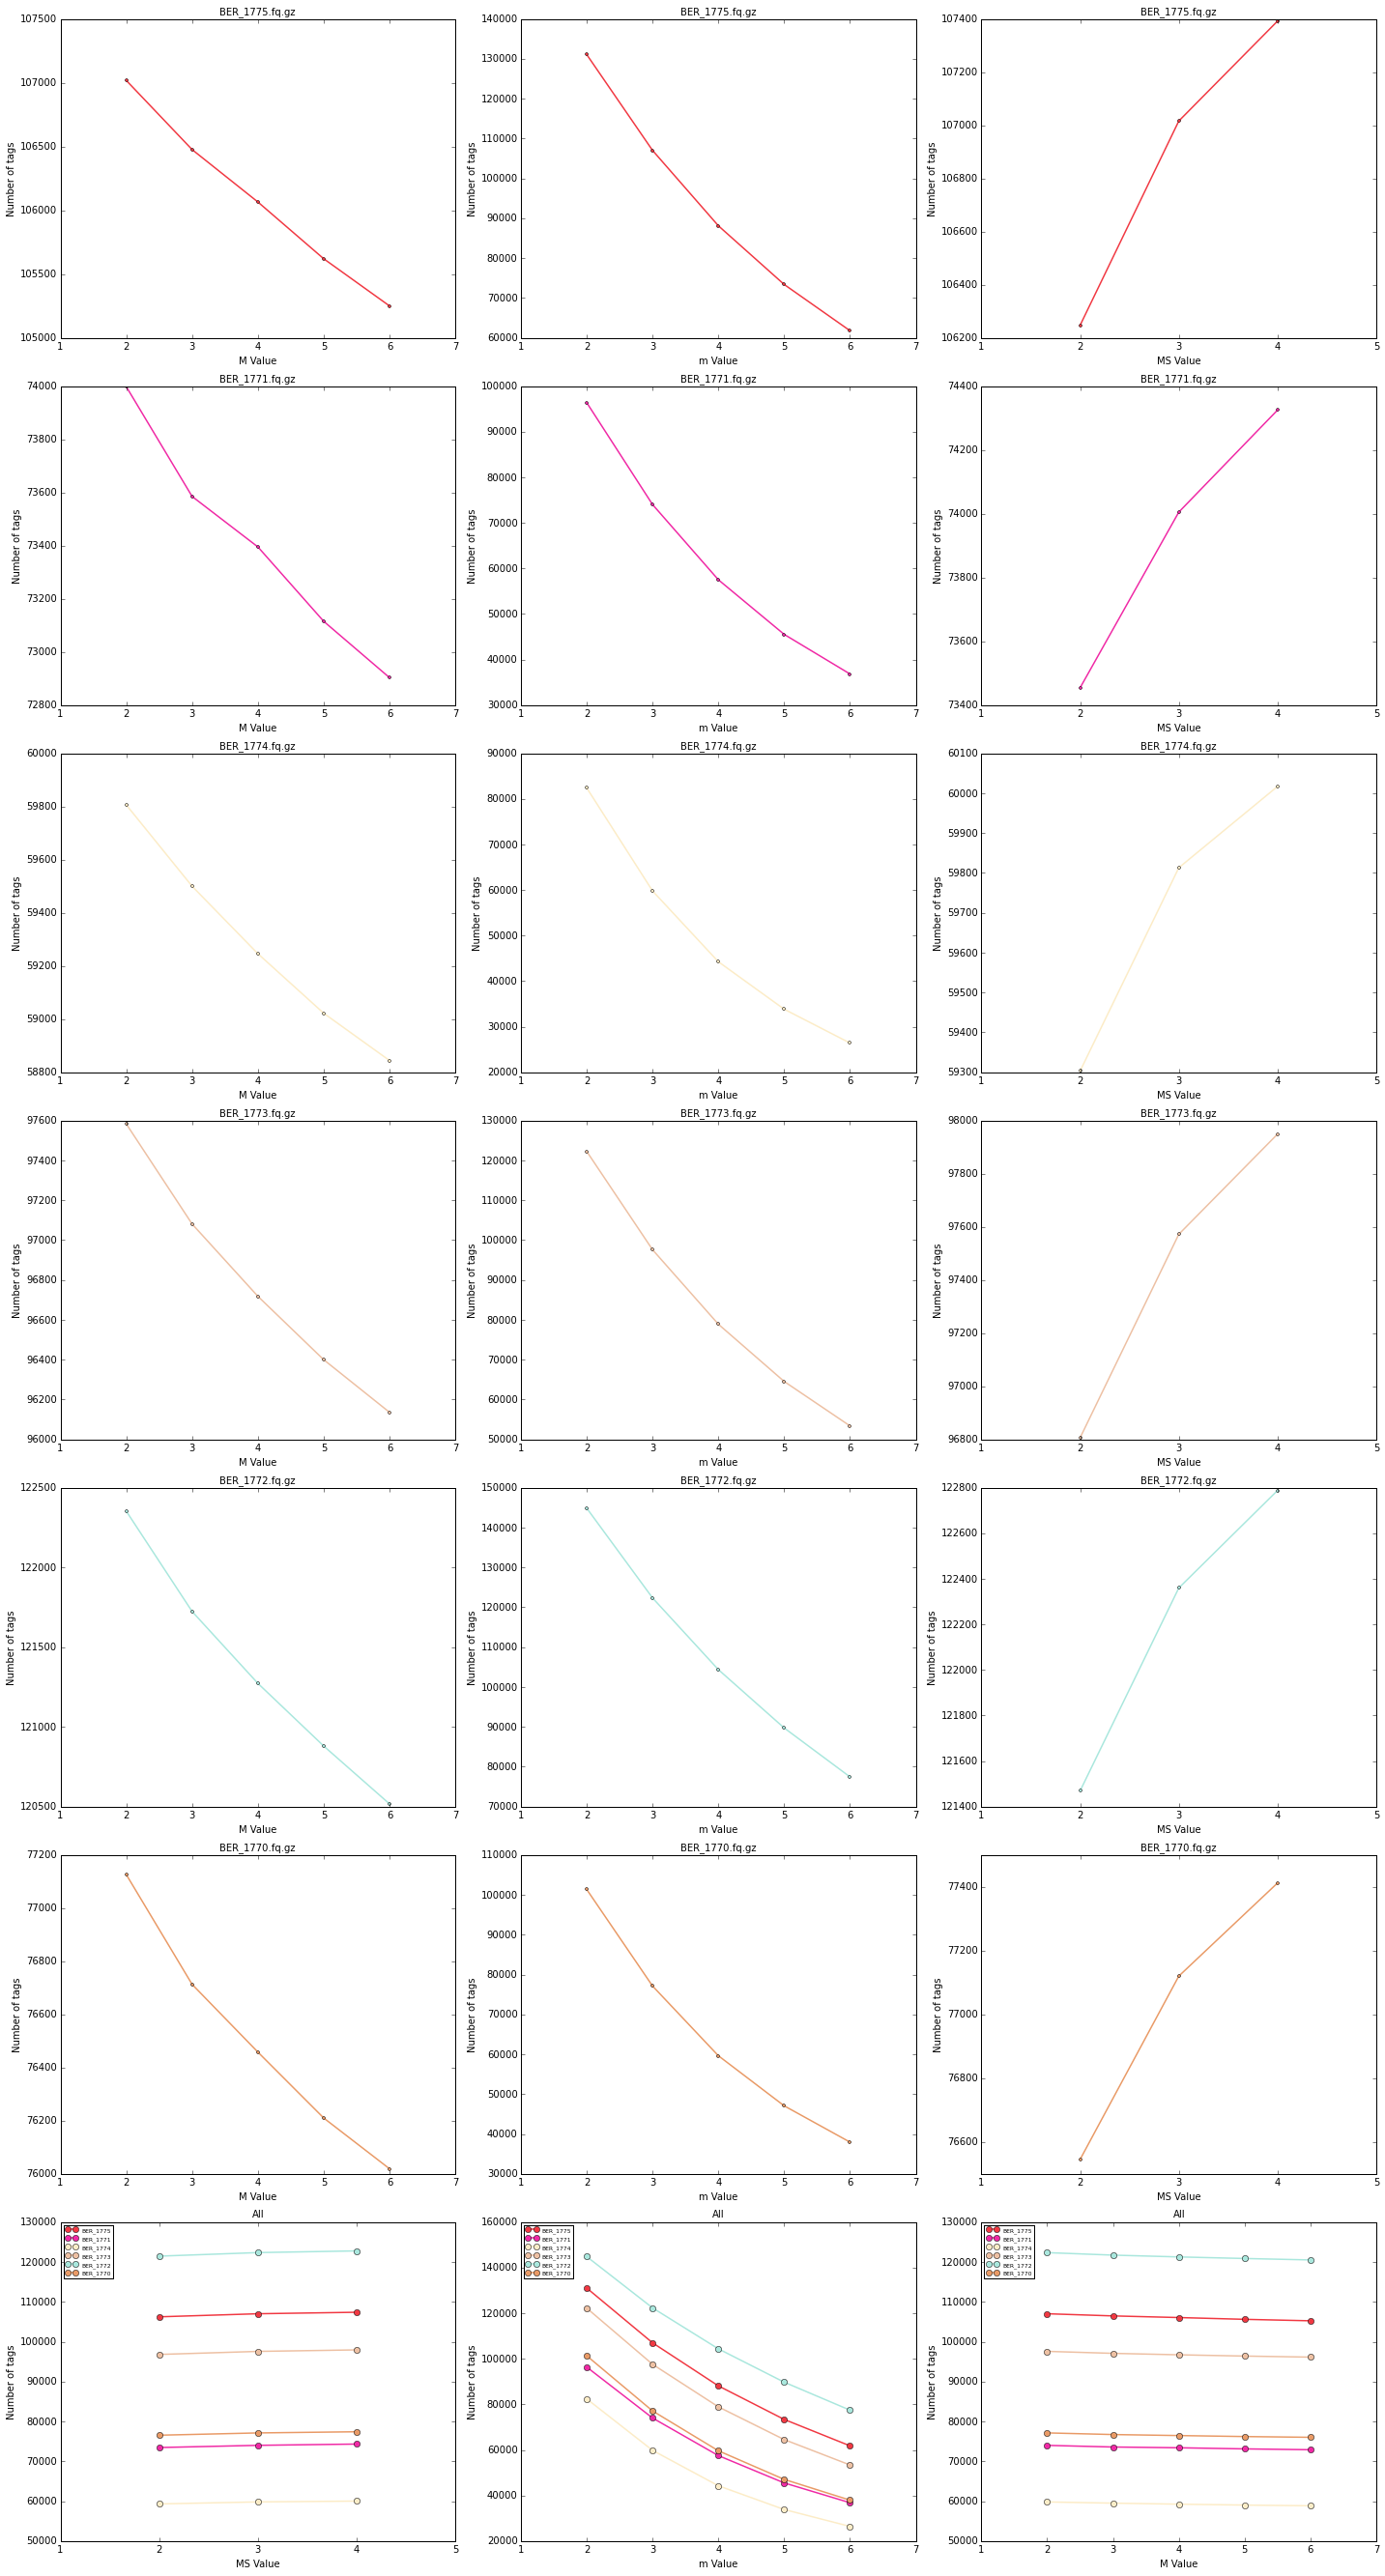

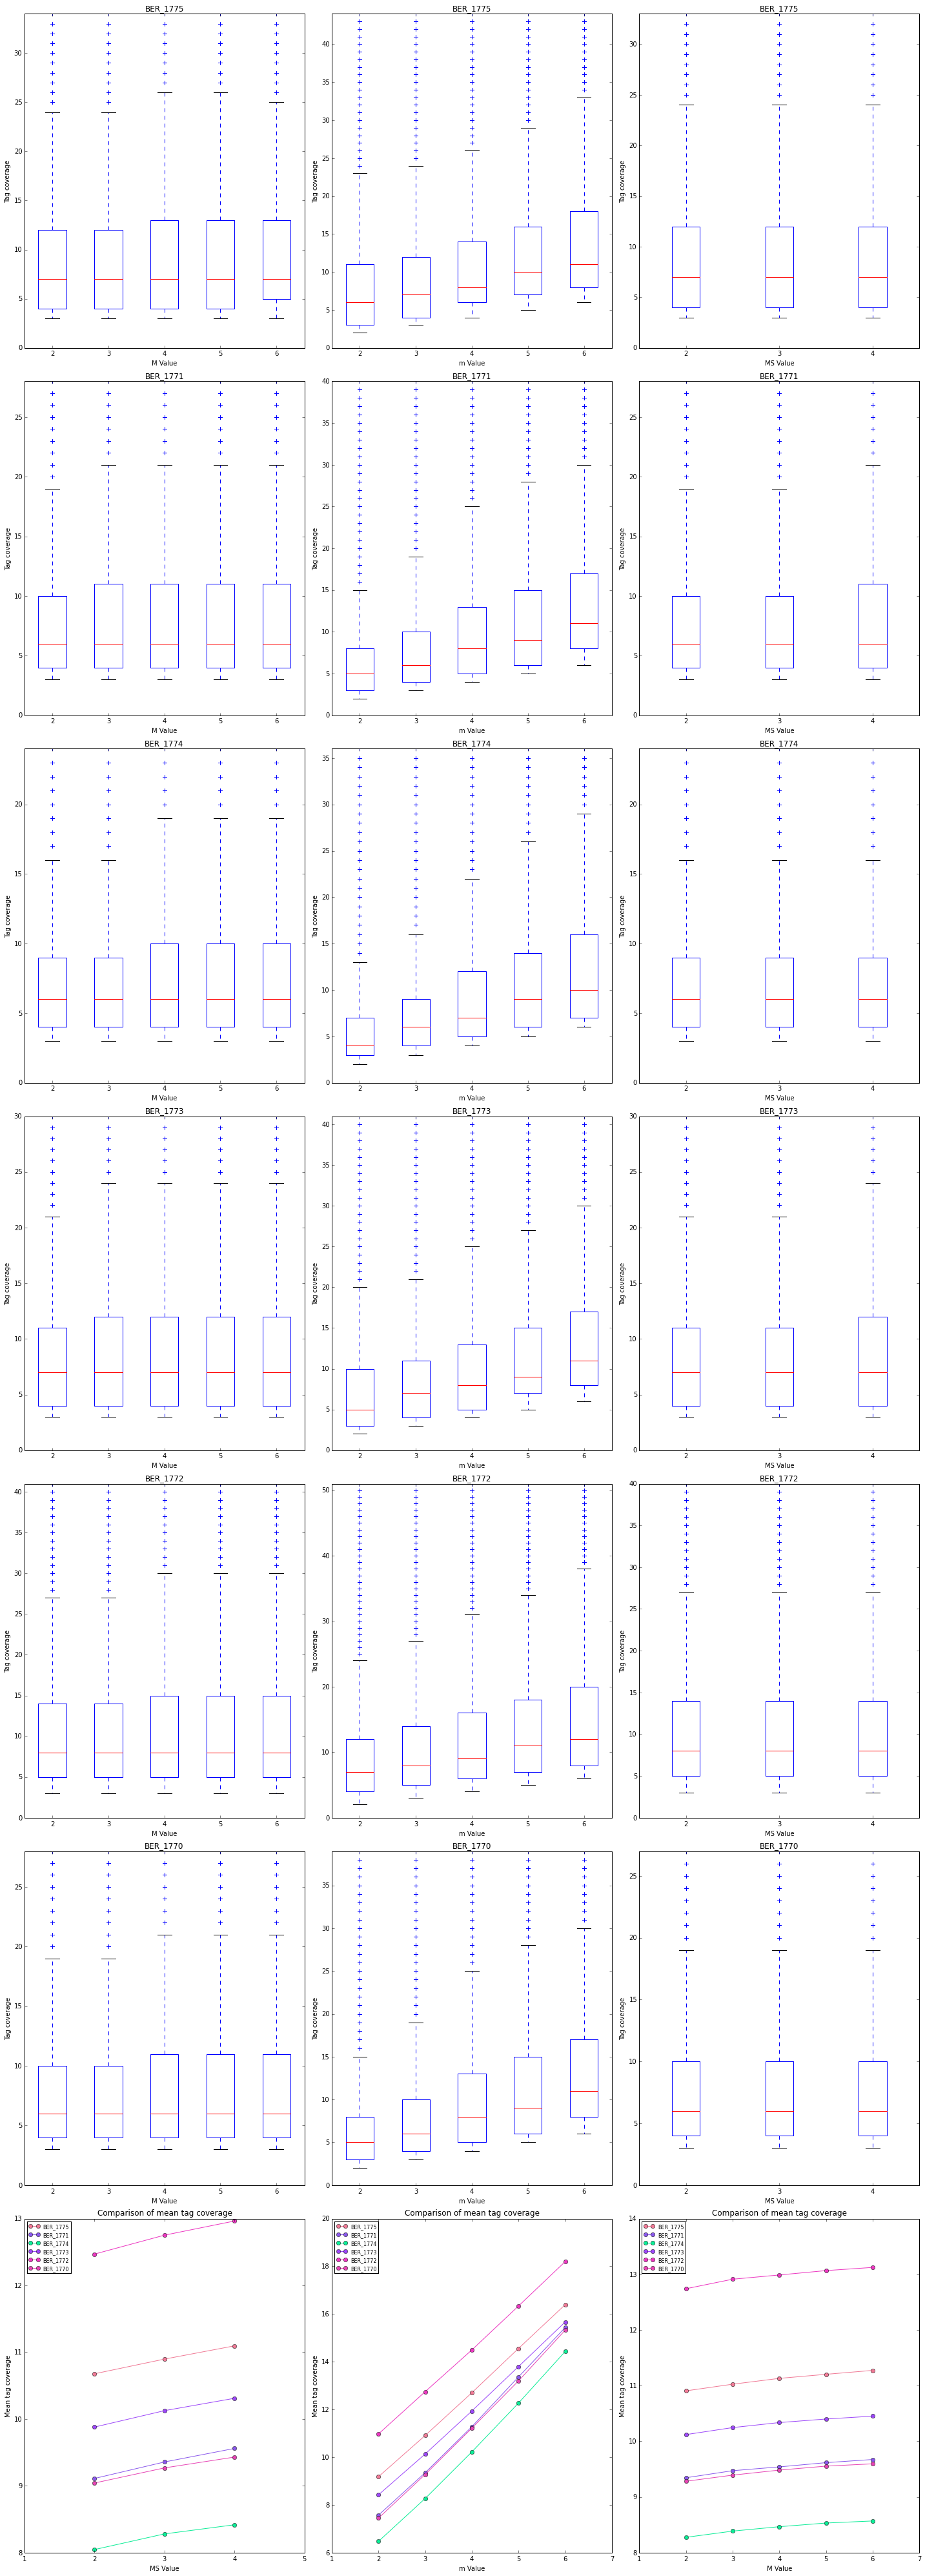

In [4]:
Incremental_U_outputs = IncU.IncreMental_U(Setup_dict)

#### Final Ustacks commands ----------------------------------------------

Used M = 2, m = 3 and other defaults in final Ustacks

###Cstacks 

In [5]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

## Get IDs for the test samples

Parameter_dict = {}
Parameter_dict["Get_IDs"] = True
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/"

IncC.Incremental_C(Parameter_dict)


 ## Sample IDs:

BER_1770, ID = 6
BER_1771, ID = 2
BER_1772, ID = 5
BER_1773, ID = 4
BER_1774, ID = 3
BER_1775, ID = 1


In [6]:
## INPUT INCREMENTAL_C PARAMETERS HERE -----------------------------------------

Parameter_dict = {}
Parameter_dict["Get_IDs"] = False
Parameter_dict["batch_ID"] = 1
Parameter_dict["n_vals"] = [1,2,3,4]
Parameter_dict["threads"] = 7
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks"
Parameter_dict["sample_ids"] = [4,5,6]   ## add specific sample ID's of samples you want to look at, if this is not all samples in the directory given above. Leave as empty list if not.
Parameter_dict["run_cline_switch"] = 1     ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(Parameter_dict)

{ 'Get_IDs': False,
  'Ustacks_outs_dir': '/home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks',
  'batch_ID': 1,
  'n_vals': [1, 2, 3, 4],
  'run_cline_switch': 1,
  'sample_ids': [4, 5, 6],
  'threads': 7}



### ----- Making and running command lines ----- ###

n value = 1
cstacks -b 1 -n 1 -s /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/BER_1770 -s /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/BER_1773 -s /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/BER_1772 7 -o /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/n_1
Running Command line

n value = 2
cstacks -b 1 -n 2 -s /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/BER_1770 -s /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/BER_1773 -s /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/BER_1772 7 -o /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/n_2
Running Command line

n value = 3
cstacks -b 1 -n 3 -s /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/BER_1770 -s /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/BER_1773 -s /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Cstacks/BER_1772 7 -o /home/djeffrie/Data/

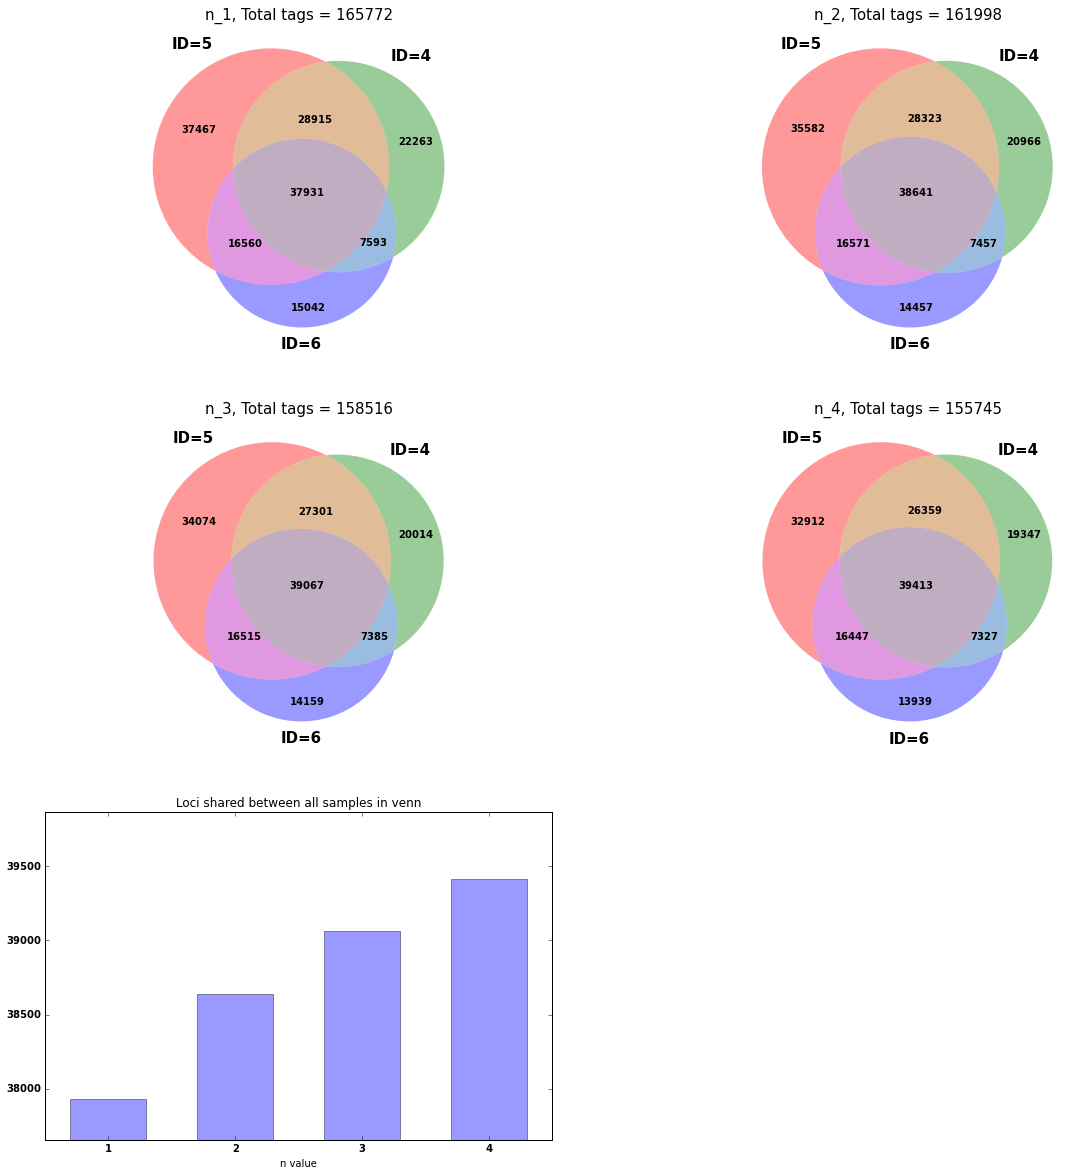

In [7]:
IncC.Incremental_C(Parameter_dict)  

####Final Cstacks command ---------------------------------------------------------------------

n = 2

All other parameters default

### Populations
         
         - First ran populations with relaxed filtering parameters (r = 0.5 and p = 1) to allow me to look at 
         the amount of missing data per individual. Then remove these samples before doing other parameter tests . . 
         (Plot not shown)
  

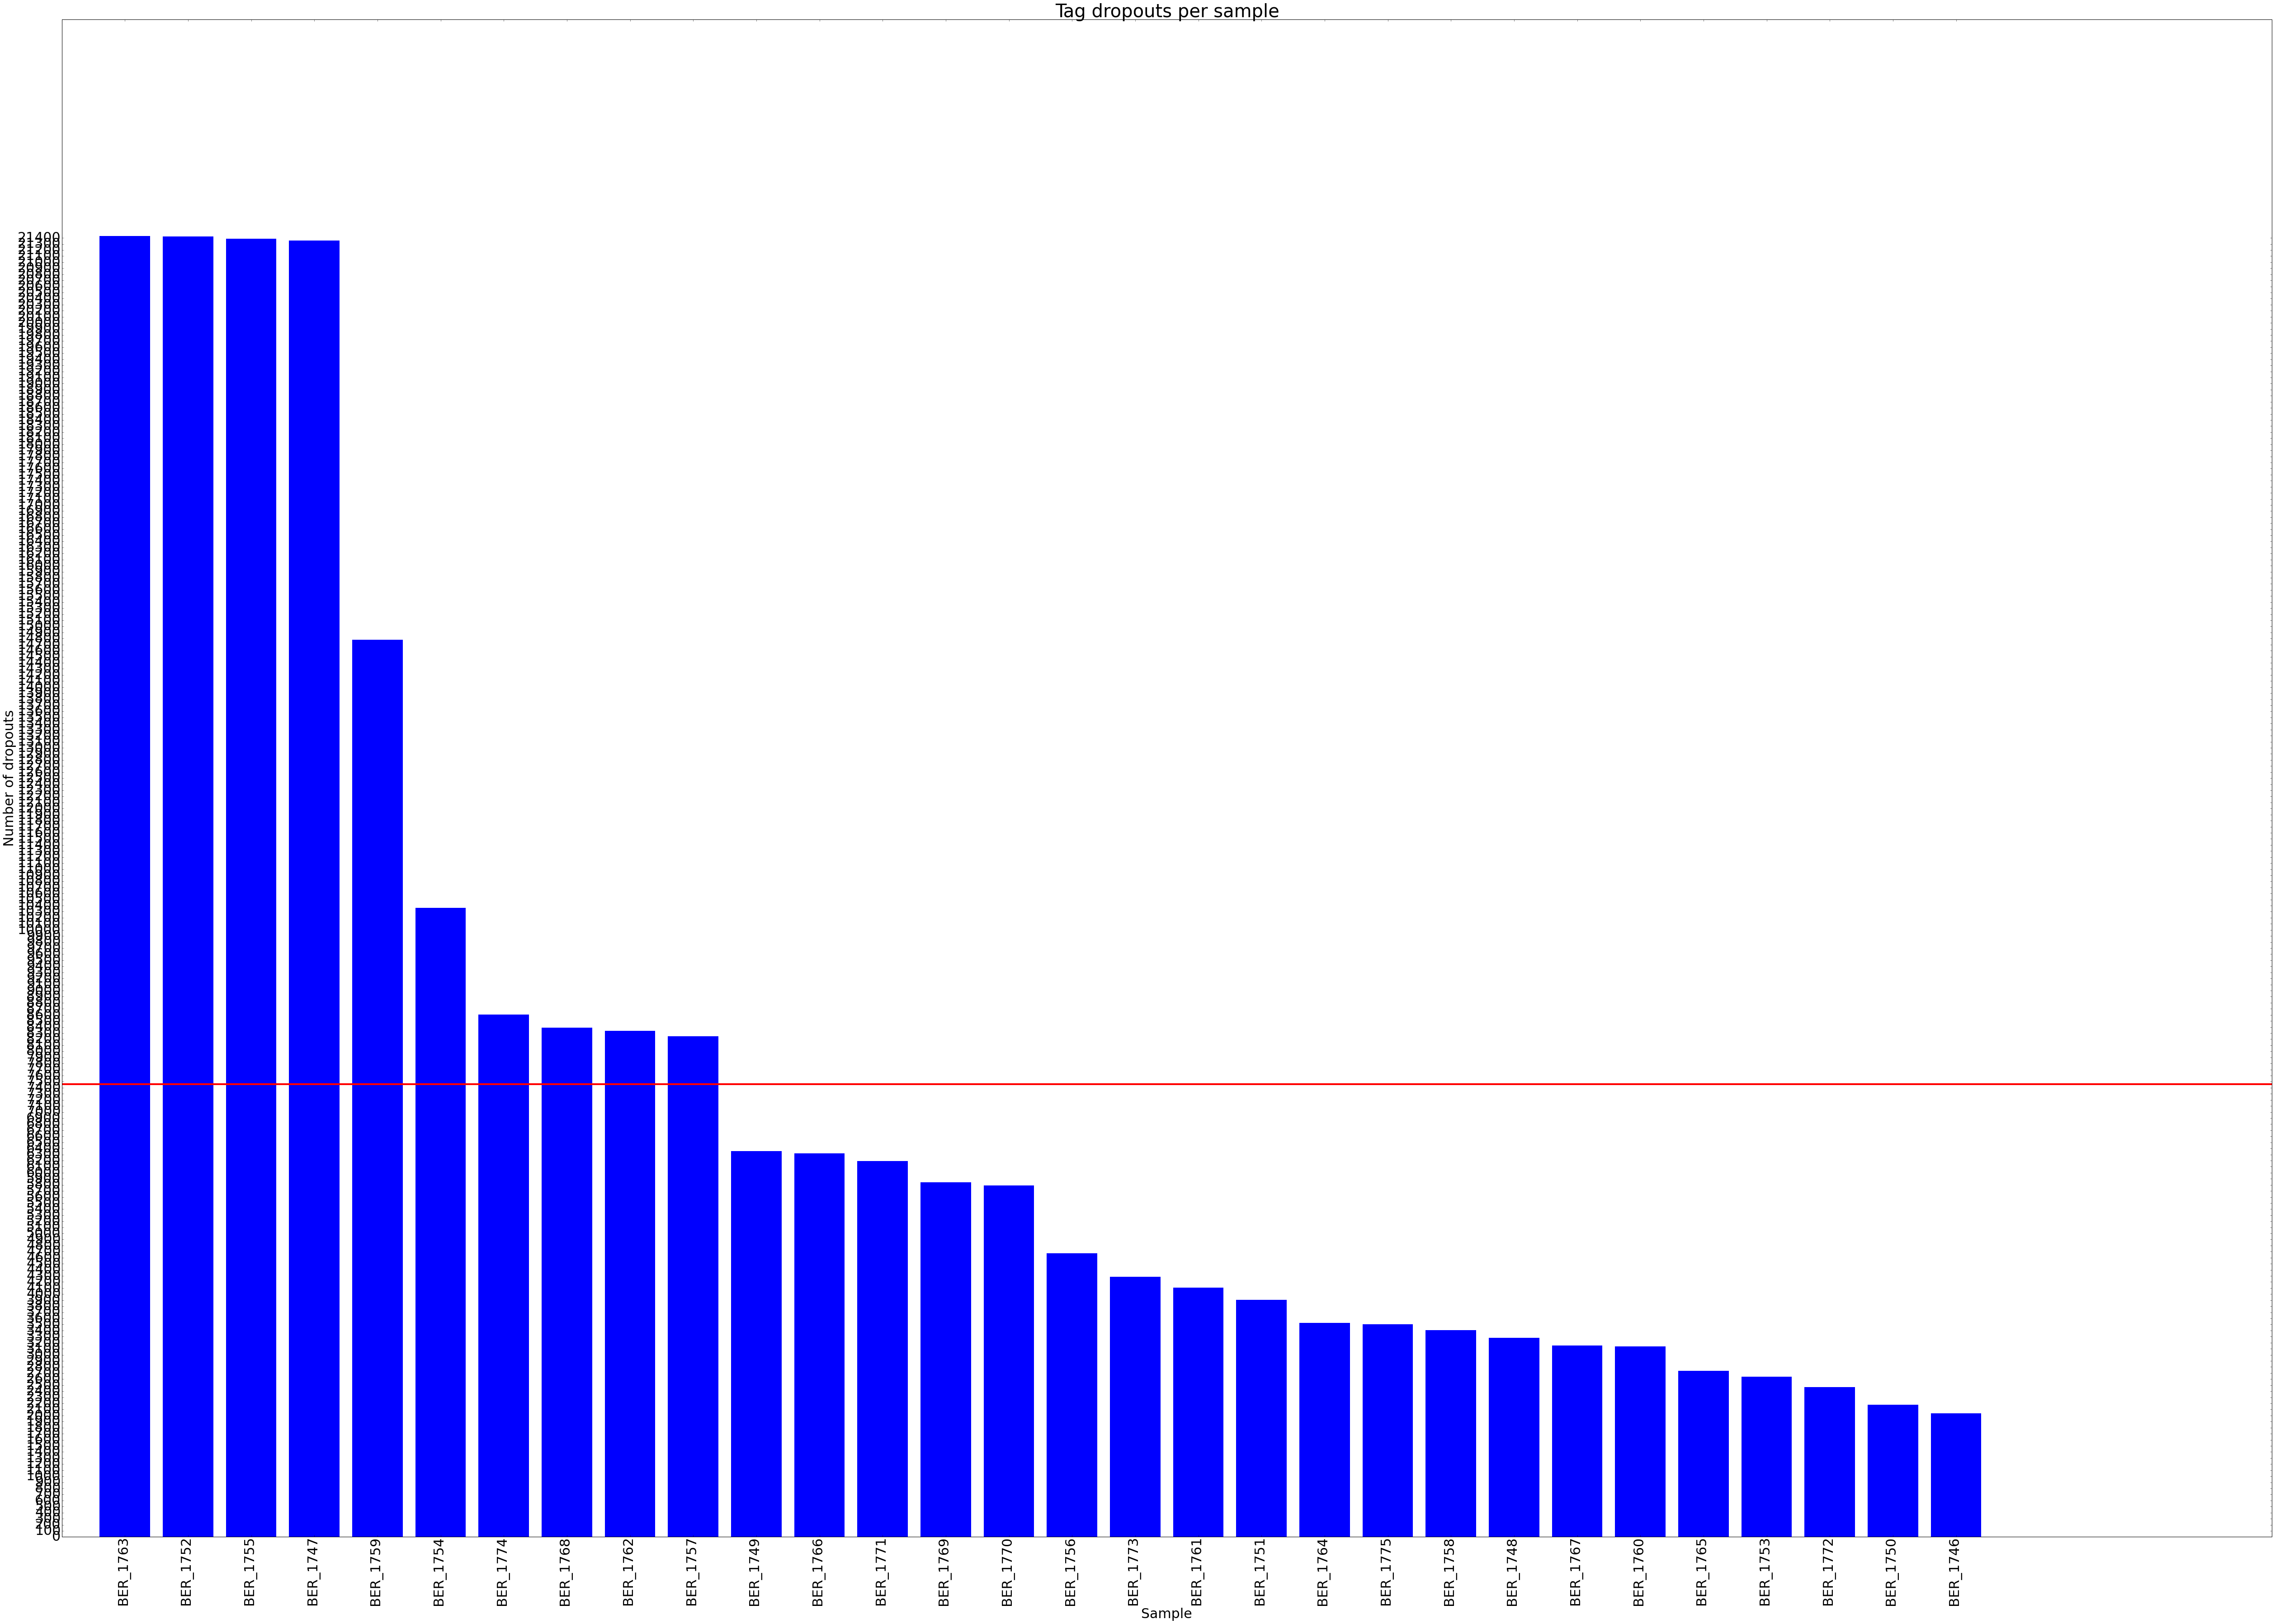

Outputs written to:
/home/djeffrie/Data/RADseq/Rberlandieri//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rberlandieri//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rberlandieri//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rberlandieri//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rberlandieri//blacklist.txt


In [4]:
## Before bad sample removal

wd = "/home/djeffrie/Data/RADseq/Rberlandieri/"

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

Removed:

    -BER_1763
    -BER_1752
    -BER_1755
    -BER_1747
    -BER_1759
    -BER_1754
    -BER_1774
    -BER_1768
    -BER_1762
    -BER_1757

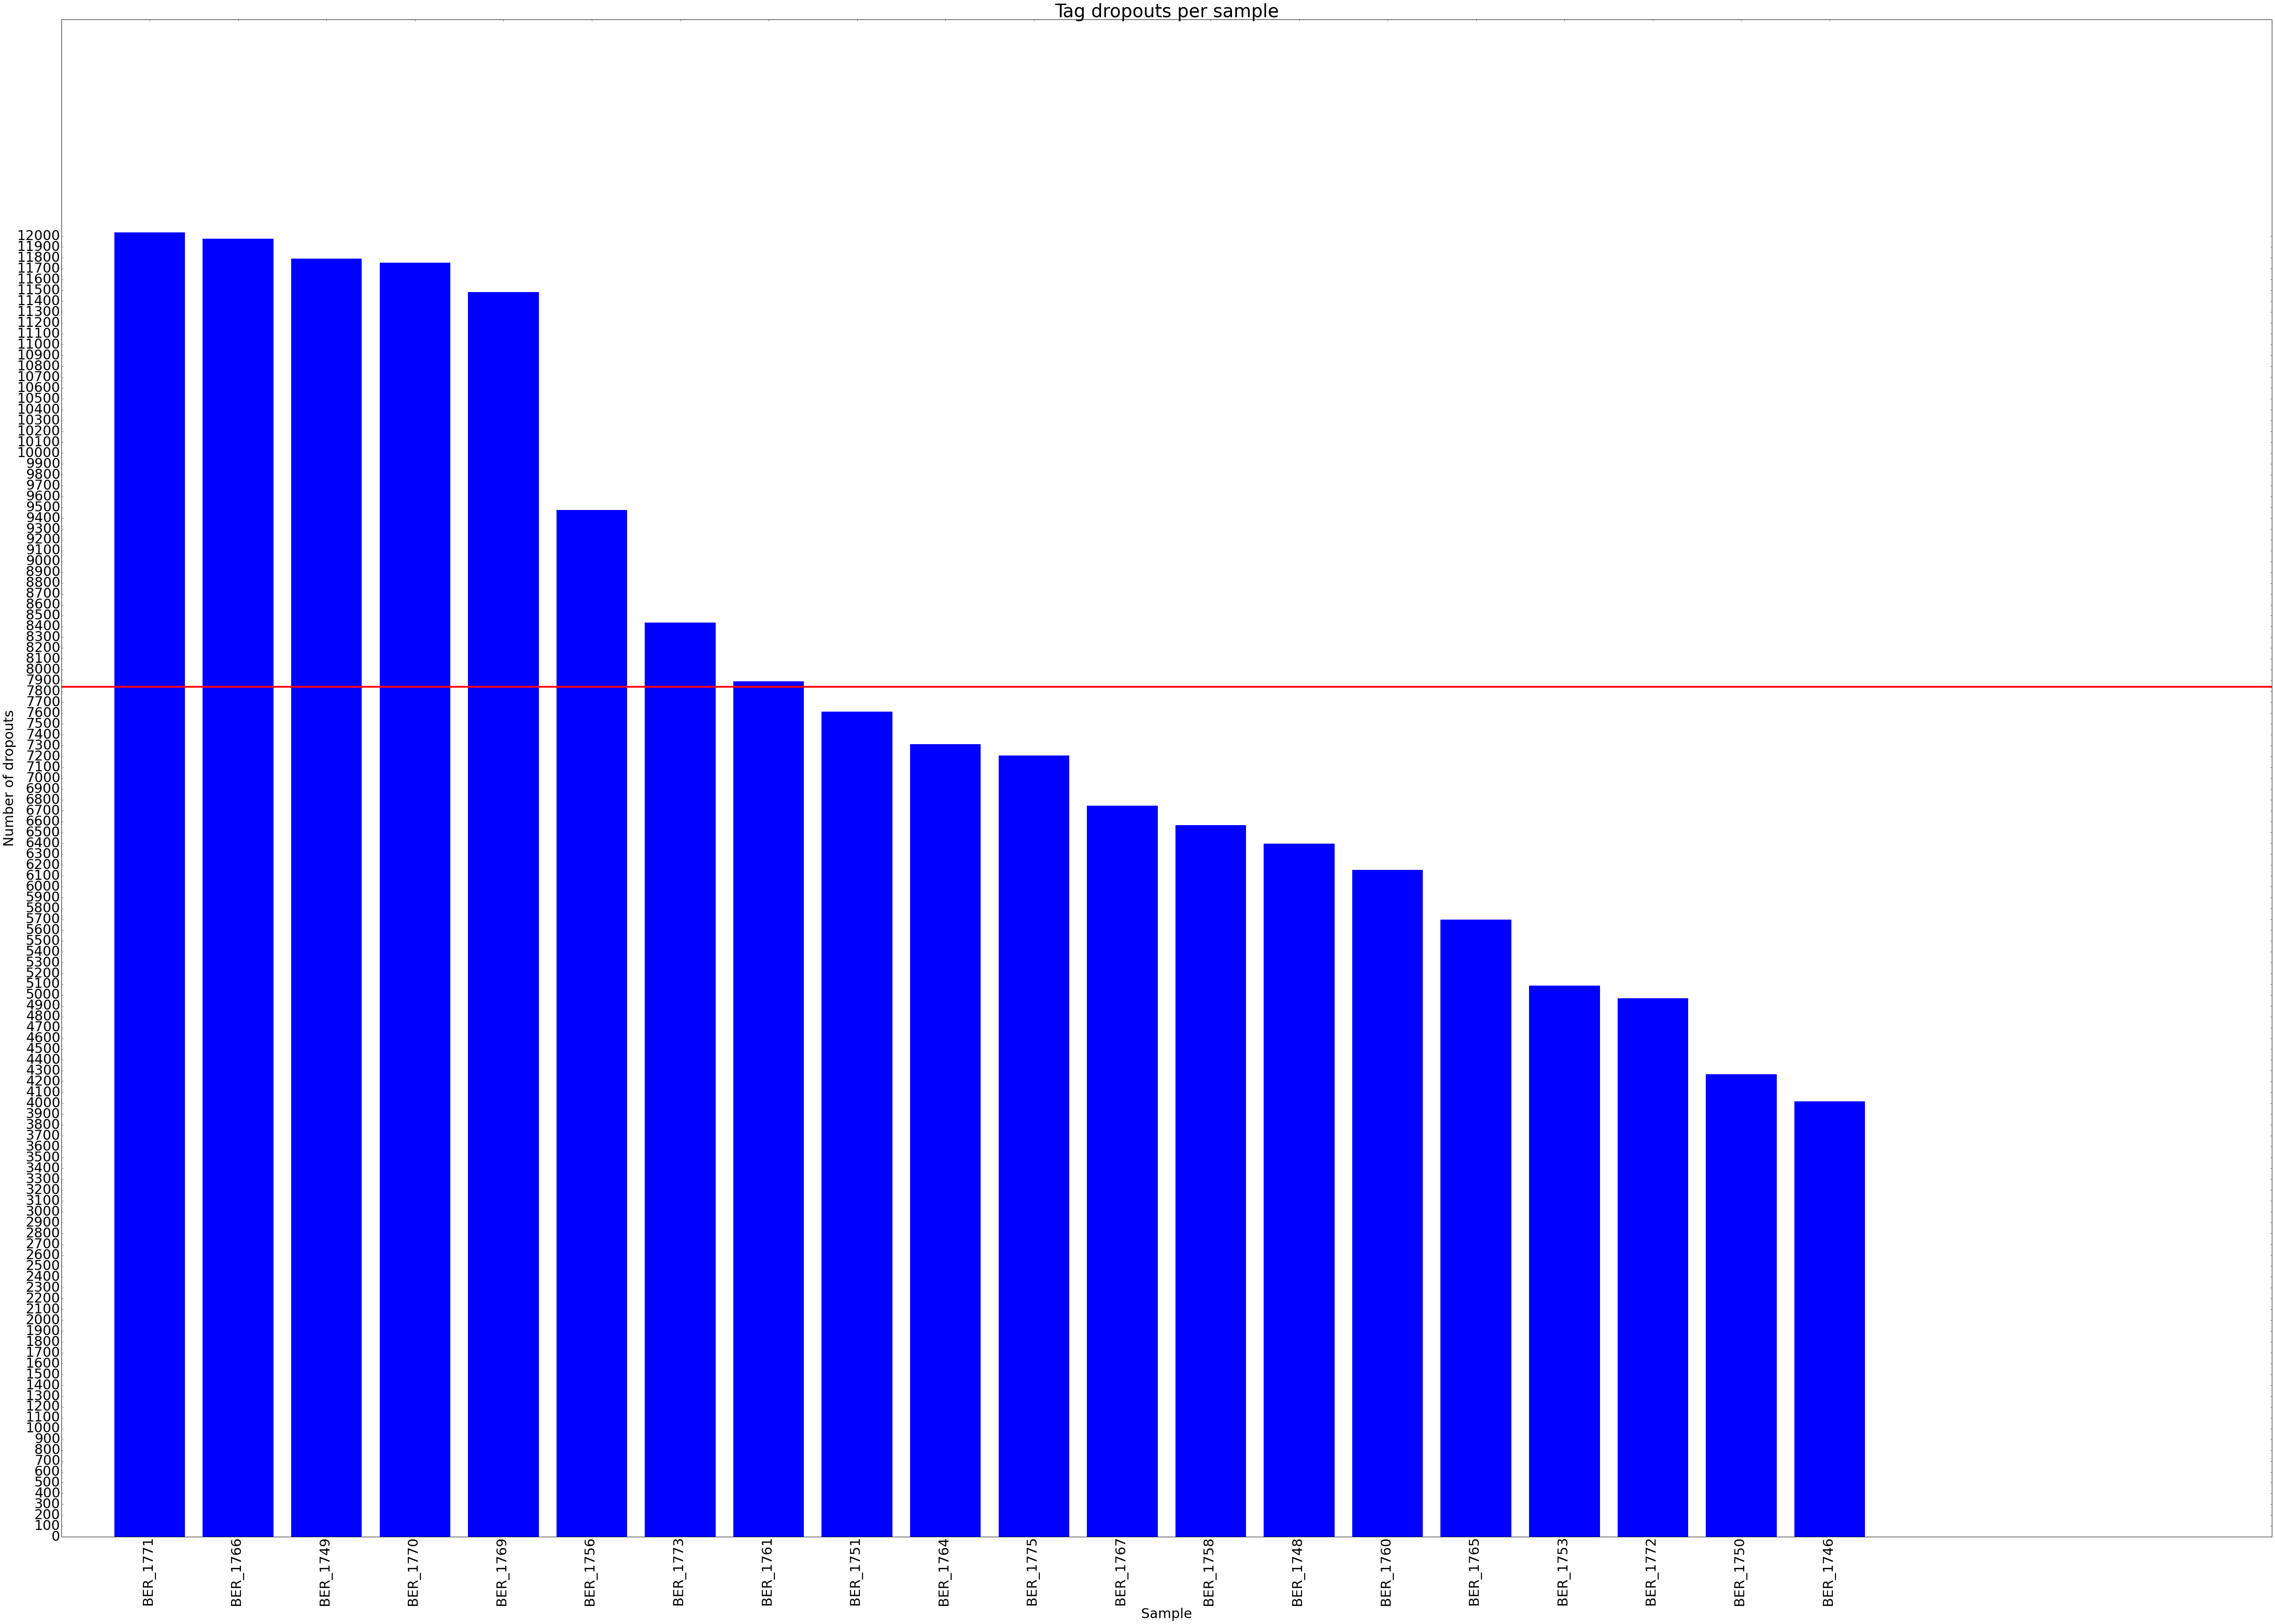

Outputs written to:
/home/djeffrie/Data/RADseq/Rberlandieri//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/RADseq/Rberlandieri//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/RADseq/Rberlandieri//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/RADseq/Rberlandieri//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/RADseq/Rberlandieri//blacklist.txt


In [6]:
## after bad sample removal

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

####Now testing populations parameters -r and -m (p tests not useful here as always want both sexes included)

In [10]:
## parameters for the Incremental populations analyses

Analysis_parameters1 = {}

## Test parameters
Analysis_parameters1["parameters"] = ["r","m"]
Analysis_parameters1["p_vals"] = []
Analysis_parameters1["p_default"] = 2 ## The value of p when other params are being tested. Set as 2 for males and females!
Analysis_parameters1["r_vals"] = [0.75, 0.85, 0.9, 0.95]
Analysis_parameters1["r_default"] = 0.75 ## The value of r when other params are being tested. 
Analysis_parameters1["m_vals"] = [2,3,4,5,6]
Analysis_parameters1["m_default"] = 3 ## The value of m when other params are being tested. 
Analysis_parameters1["Populations_test_dir_path"] = "/home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations"
Analysis_parameters1["run_cline_switch"] = 1 ## run command line or not. 

## Mandatory Populations options
Analysis_parameters1["b"] = 1 ## batch ID
Analysis_parameters1["P"] = "/home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations"## Path to stacks outputs
Analysis_parameters1["M"] = "/home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations/sex_info_kept.txt" ## All samples

## Outputs parameters
Analysis_parameters1["vcf"] = True
Analysis_parameters1["vcf_haplotypes"] = True

## Optional parameters
Analysis_parameters1["t"] = 7 ## number of threads
Analysis_parameters1["min_maf"] = 0.05 ## number of threads

#Analysis_parameters1["B"] = None ## Locus blacklist
Analysis_parameters1["write_single_snp"] = True ## switch to write first snp of locus or not.
Analysis_parameters1["fstats"] = False

## Running command lines ##
populations -b 1 -P /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations -M /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations/sex_info_kept.txt -t 7 -r 0.75 -p 2 -m 3 --min_maf 0.05 --write_single_snp --vcf --vcf_haplotypes    ## FINISHED 
Files moved to /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations/r_tests/r_075
## Running command lines ##
populations -b 1 -P /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations -M /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations/sex_info_kept.txt -t 7 -r 0.85 -p 2 -m 3 --min_maf 0.05 --write_single_snp --vcf --vcf_haplotypes    ## FINISHED 
Files moved to /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations/r_tests/r_085
## Running command lines ##
populations -b 1 -P /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations -M /home/djeffrie/Data/RADseq/Rberlandieri/Incremental/Populations/sex_info_kept.txt -t 7 -r 0.9 -p 2 -m 3 --min_maf

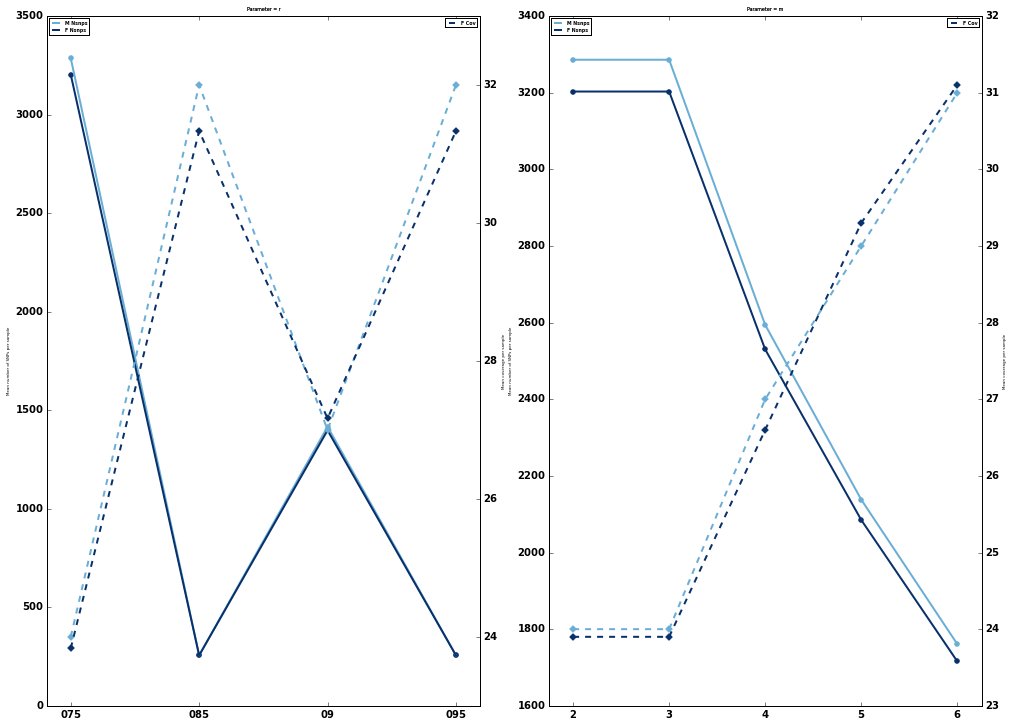

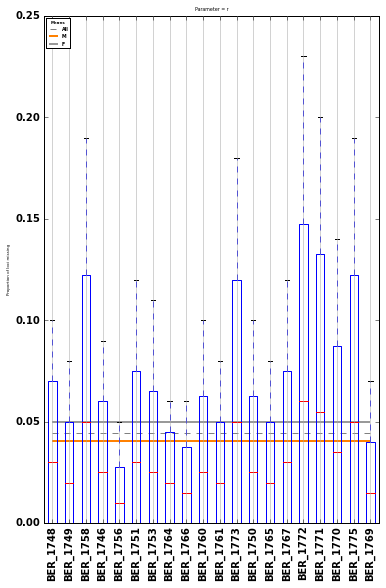

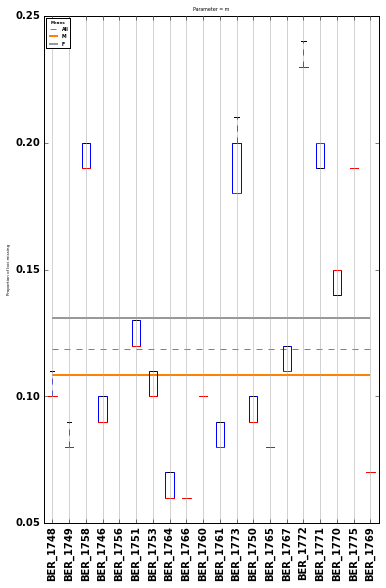

In [11]:
Sample_data, Locus_data, group_info = IncPop.Incremental_Pop(Analysis_parameters1)

#### Final Populations command 

-p 2 

-r 0.75

-M sex_info.txt

all other parameters defaults

#### Check the final snp dataset, e.g. amount of locus/ sample dropout, coverage etc

Number of tags =  32618
Average tag coverage 12.9974293335 (+- 10.9822596927 )


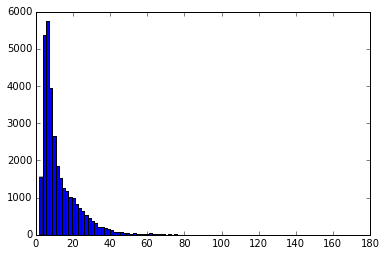

Mean sample coverage = 13.0 (+/3.54) 


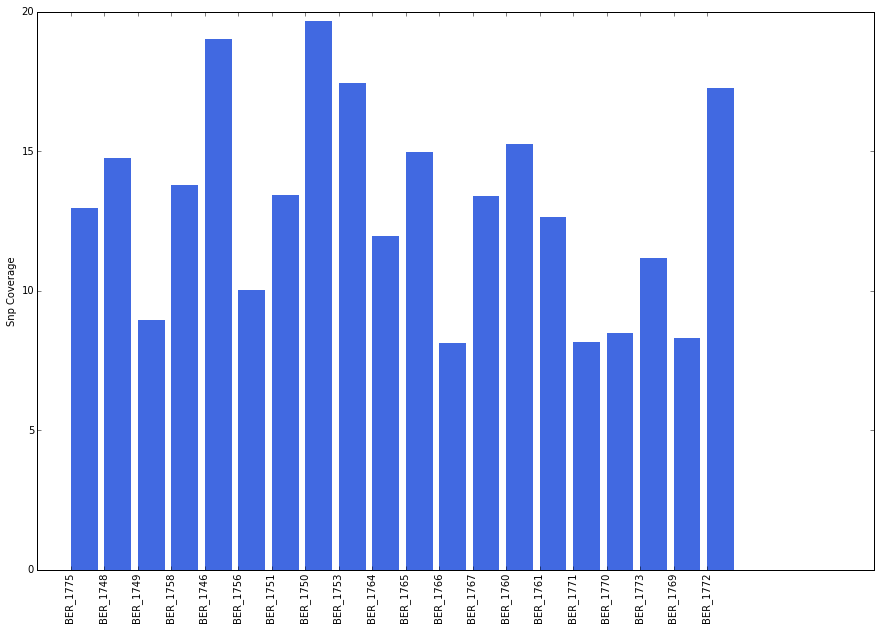

In [7]:
final_vcf = "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/batch_1.vcf"
final_popmap = "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/Sex_ID_info_kept.txt"

MISC.av_tag_cov(final_vcf, "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/Av_tag_cov.out")
MISC.sample_Avcov_from_vcf(final_vcf)


### Now find sex linked markers using the 3 approaches in Brelsford & Lavanchy et al (2016)

First using all samples (from both populations) pooled together

In [2]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/Sex_ID_info_kept.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 11460
Number of samples = 20
Number of loci with too few samples = 1553
Number of loci with low MAF = 6809
Number of loci with enough data = 3097
Number of putative X linked snps = 10
Number of putative X linked tags = 10
Number of putative Z linked markers = 5
Number of putative Z linked tags = 5


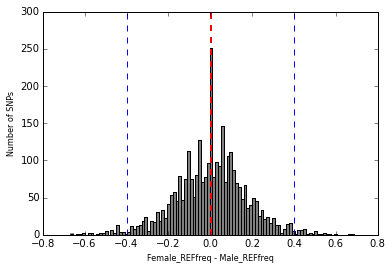


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 11460
Number of samples = 20
Number of loci with too few samples = 1552
Number of loci with low MAF = 6809
Number of loci with enough data = 3097
Number of putative X linked snps = 16
Number of putative X linked tags = 16
Number of putative Z linked markers = 9
Number of putative Z linked tags = 9

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 9
Number of males: 11
Number of Putative Y linked tags: 51
Number of Putative W linked tags: 6

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers

 ## After merging tags accross methods ## 

Final number of XY tags = 72
Final number of ZW tags = 20


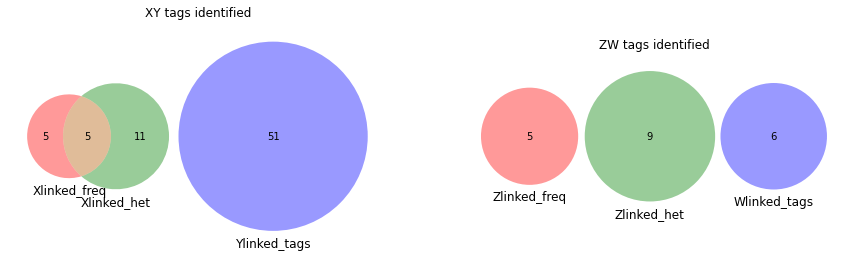

In [3]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

In [4]:
vcf_path = "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/batch_1.vcf"

MISC.filter_vcf(vcf_path, XYset , "XY_linked_snps_freq_het.vcf")

In [7]:
%%bash

wd=/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/  ## just change this line

## All data 
sed 's/_/-/g' $wd/XY_linked_snps_freq_het.vcf > $wd/XY_altered_adegenet.vcf

/home/djeffrie/Programs/plink_linux_x86_64/plink --vcf $wd/XY_altered_adegenet.vcf --recode A --allow-extra-chr -out $wd/XY_plink


PLINK v1.90b3.39 64-bit (4 Aug 2016)       https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers//XY_plink.log.
Options in effect:
  --allow-extra-chr
  --out /home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers//XY_plink
  --recode A
  --vcf /home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers//XY_altered_adegenet.vcf

32083 MB RAM detected; reserving 16041 MB for main workspace.
--vcf:
/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers//XY_plink-temporary.bed
+
/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers//XY_plink-temporary.bim
+
/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers//XY_plink-temporary.fam
written.
21 variants loaded from .bim file.
20 people (0 males, 0 females, 20 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers//XY_plink.nosex .


In [8]:
%%R

## Load packages and functions needed

library(adegenet)
library(ggplot2)
source("~/Dropbox/My_Dropbox_Scripts/R/My_functions/Sex_sorter_PCA_plotting_function.txt")

## Reading in the data -------------------------------------------------------------------------------

setwd("/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/") 

## All SNPs (about 80,000)
alldata <- read.PLINK('XY_plink.raw', chunkSize=1000, parallel = TRUE, n.cores=1, saveNbAlleles=T) 

## Sex information:
sexes <- read.delim("Sex_ID_info_kept.txt", header = F)

## Running PCA ---------------------------------------------------------------------------------------

pca1 <- glPca(alldata, parallel = TRUE, n.cores = 6, nf = 5) 


/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ade4

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
   /// adegenet 2.0.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Saving 19.7 x 19.7 in image

  warnings.warn(x, RRuntimeWarning)


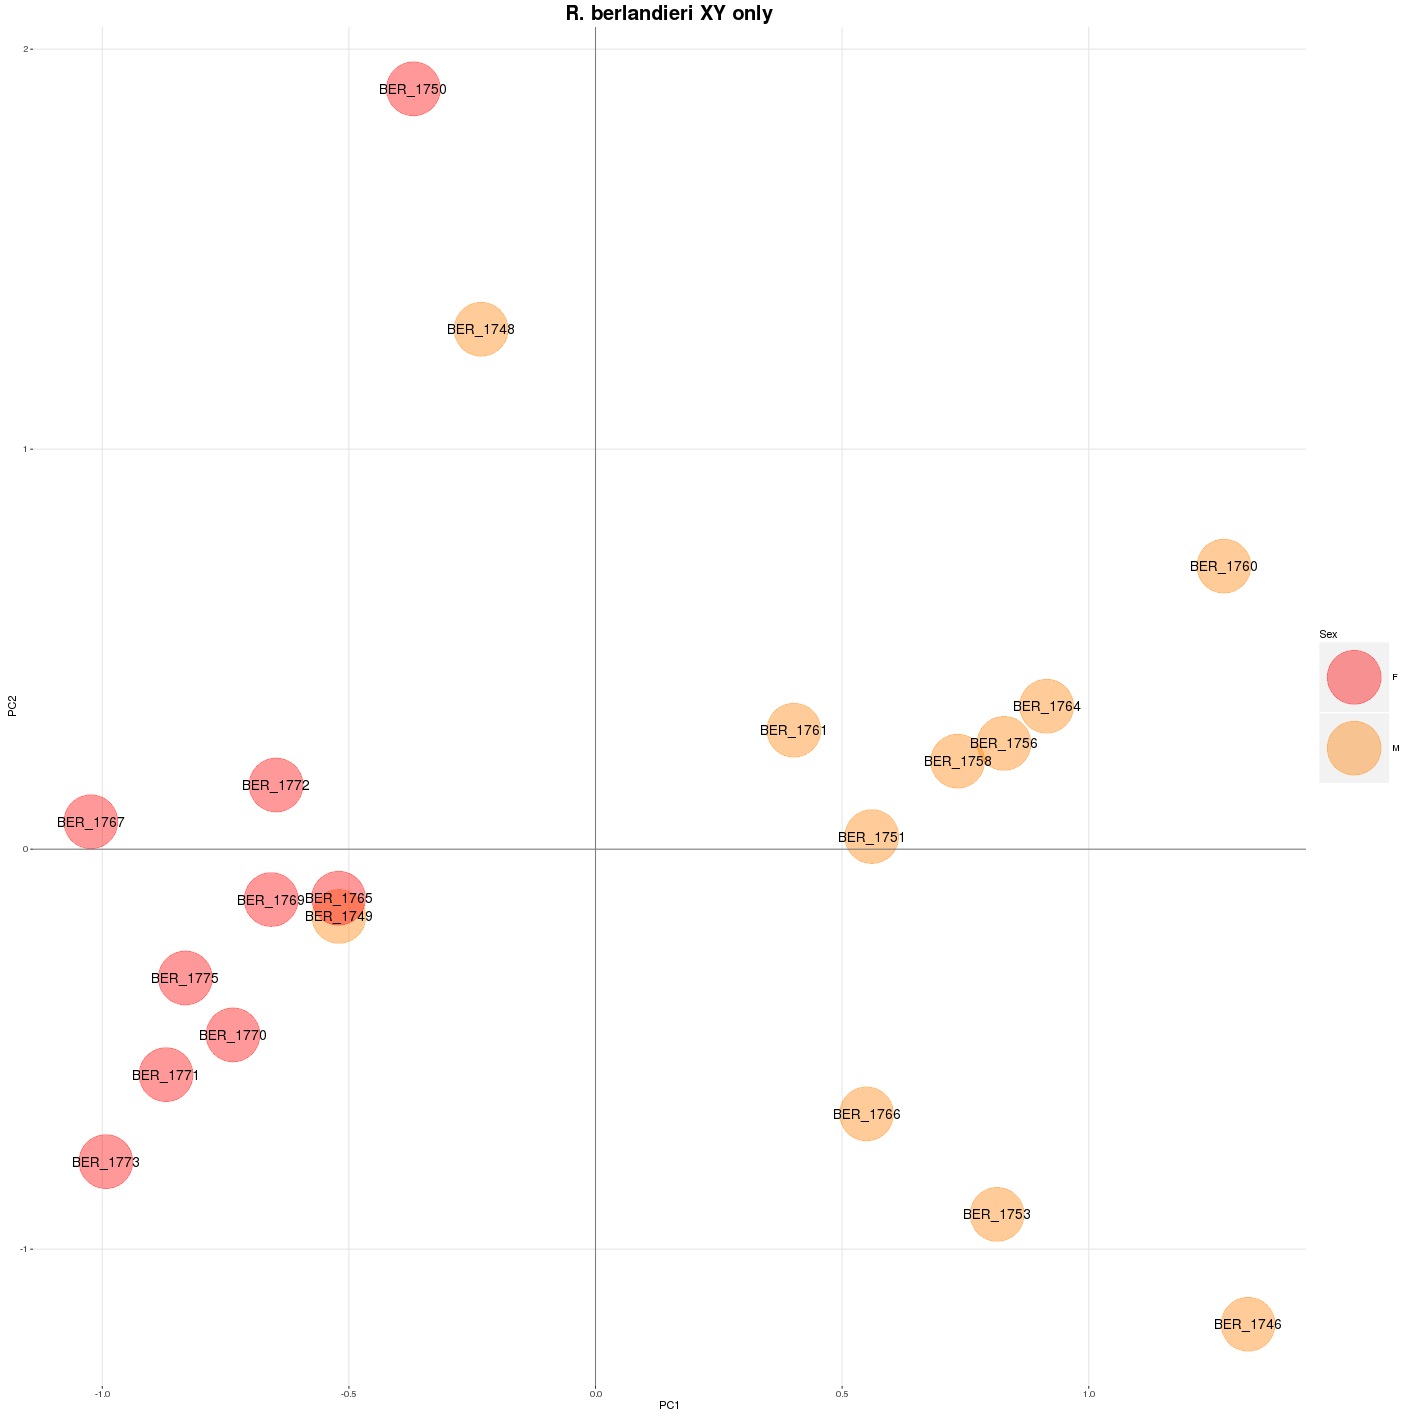

In [9]:
%%R -w 50 -h 50 -u cm
## Plotting the PCAs using the Sex_sorter function.

Sex_sorter(pca1,   ## PCA object
           sexes,  ## sex_info file
           c(1,2), ## which components to plot
           Title = "R. berlandieri XY only", ## plot title
           xtitle = "PC1", ## X axis title
           ytitle = "PC2", ## Y axis title 
           Palette = rainbow(12), ## Colours to use
           func_cex = 5) ## Size of points and text in plots) 

definitely looks like there are a couple of strange samples here. . . try again with a revised pop_code file - will change BER_1749 to female and rmove the two outliers

In [14]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers/Sex_ID_info_kept_2.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 1 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 1 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.5 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 7 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 11460
Number of samples = 20
Number of loci with too few samples = 2584
Number of loci with low MAF = 6809
Number of loci with enough data = 2066
Number of putative X linked snps = 13
Number of putative X linked tags = 13
Number of putative Z linked markers = 2
Number of putative Z linked tags = 2


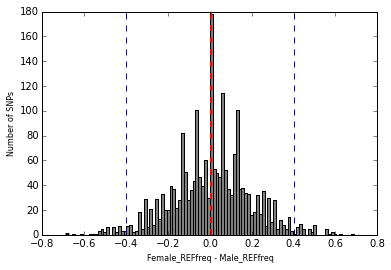


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 11460
Number of samples = 20
Number of loci with too few samples = 2582
Number of loci with low MAF = 6809
Number of loci with enough data = 2066
Number of putative X linked snps = 26
Number of putative X linked tags = 26
Number of putative Z linked markers = 9
Number of putative Z linked tags = 9

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of males: 9
Number of males: 9
Number of Putative Y linked tags: 106
Number of Putative W linked tags: 24

 ### DONE! ###

Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Rberlandieri/Sex_linked_markers

 ## After merging tags accross methods ## 

Final number of XY tags = 143
Final number of ZW tags = 35


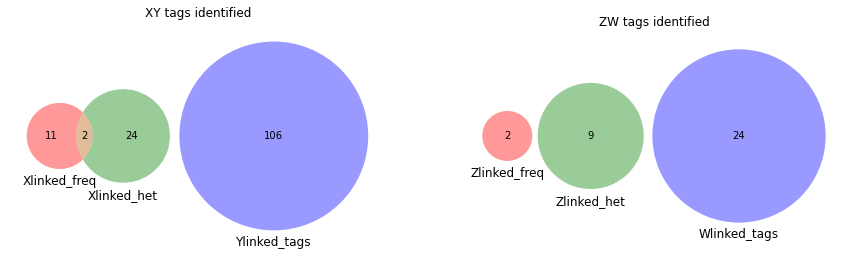

In [15]:
XYset, ZWset = MISC.Super_SLM_finder(Parameter_dict, "111")

### Much better!! 

### ZW coverages

## Summary:

So there are 134 tags identified as XY linked, as opposed to 35 which support a ZW system.



## Manual mapping

In [3]:
from Bio.Blast.Applications import NcbiblastnCommandline
import MISC_RAD_tools as MISC
import shutil

Rtemp_fasta = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa"
Rtemp_db = "/home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2-blastn-db"

Nano_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta"
Nanorana_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_blast_db"

Xen_db = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xenoupus_blastdb"
Xen_fasta = "/home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Xenopus_genome/Xtropicalis.v9.repeatMasked.fa"


best_hit_crit = 1e-3
Eval_threshold = 1e-15
Window = 4000

wd = "/home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_berlandieri/"
prefix = "R_ber"

### Tags to Rtemp

print "\n##  Mapping tags to R. temporaria  ##\n"

tags ="%s/%s" % (wd, "R_berlandieri.fa")
tags_to_Rtemp_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "tags_Rtemp_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=tags, db=Rtemp_db, outfmt=5, out=tags_to_Rtemp_blastnouts)
stdout, stderr = blastn_cline()

Rtemp_records = MISC.BlastParseExtra(tags_to_Rtemp_blastnouts, Rtemp_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_blast_chunks = "%s/%s" % (wd,  "%s_%s" % (prefix, "Rtemp_4k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_4000_chunks.fa"), Rtemp_blast_chunks)


### Rtemp chunks to Nanorana

print "\n##  Mapping Rtemp chunks Nanorana  ##\n"

tags_Rtemp_Nano_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_blast_chunks, db=Nanorana_db, outfmt=5, out=tags_Rtemp_Nano_blastnouts)
stdout, stderr = blastn_cline()

Nano_records = MISC.BlastParseExtra(tags_Rtemp_Nano_blastnouts, Nano_fasta , best_hit_crit, Eval_threshold,Window)

Rtemp_Nano_blast_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_4k_chunks.fa"))

shutil.move("%s/%s" % (wd,"blast_4000_chunks.fa"), Rtemp_Nano_blast_chunks)



### Nanorana chunks to Xenopus

print "\n##  Mapping Nanorana chunks Xenopus  ##\n"

tags_Rtemp_Nano_Xen_blastnouts = "%s/%s" % (wd, "%s_%s" % (prefix, "Rtemp_Nano_Xen_blastnouts.xml"))

blastn_cline = NcbiblastnCommandline(query=Rtemp_Nano_blast_chunks, db=Xen_db, outfmt=5, out=tags_Rtemp_Nano_Xen_blastnouts)
stdout, stderr = blastn_cline()

Xen_records = MISC.BlastParseExtra(tags_Rtemp_Nano_Xen_blastnouts, Xen_fasta , best_hit_crit, Eval_threshold,Window)

Xen_chunks = "%s/%s" % (wd,"%s_%s" % (prefix, "Rtemp_Nano_Xen_4kb_chunks.fa"))
                                      
shutil.move("%s/%s" % (wd,"blast_4000_chunks.fa"), Xen_chunks)



### Get the Xenopus summary

print "\n##  Final Xenopus hits  ##\n"

from collections import Counter 
Xen_hits = []
for i in Xen_records:
    Xen_hits.append(Xen_records[i]["Ref_hit_id"])
    print i, Xen_records[i]["Ref_hit_id"]


##  Mapping tags to R. temporaria  ##

Number of multi-alingments kept: 11
Number of unique alingments kept: 10
Getting subject scaffold segments from /home/djeffrie/Data/Genomes/Rtemp/V2/Rtemp_gapfilled_iter2_flted2.fa . . . 
21 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_berlandieri//blast_4000_chunks.fa

##  Mapping Rtemp chunks Nanorana  ##

Number of multi-alingments kept: 5
Number of unique alingments kept: 2
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_mapping/Nanorana_blast_db/Nanorana_parkeri.genome.v2.fasta . . . 
7 sequence scaffold segments are in /home/djeffrie/Data/Mapping_SL_tags_to_genomes/Sex_linked_tags/Manual_mapping/R_berlandieri//blast_4000_chunks.fa

##  Mapping Nanorana chunks Xenopus  ##

Number of multi-alingments kept: 0
Number of unique alingments kept: 0
Getting subject scaffold segments from /home/djeffrie/Data/RADseq/STOECK/Bviridis/Genome_map